## **Exploring Cybersecurity Datasets for Data Mining and Machine Learning **
## **Murat Can Önder - 119200089**
## **Uğur Çelik - 119200045**

## **MTH410: DATA MINING FOR CYBERSECURITY**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [22]:
#Load the data
attack_traffic = pd.read_csv('CTU13_Attack_Traffic.csv')
normal_traffic = pd.read_csv('CTU13_Normal_Traffic.csv')


In [23]:
# Check the missing values
print(attack_traffic.isnull().sum())
print(normal_traffic.isnull().sum())

# Fill in or subtract the missing values
attack_traffic = attack_traffic.dropna()
normal_traffic = normal_traffic.dropna()


Unnamed: 0           0
Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Bwd PSH Flags        0
Fwd Header Len       0
Bwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std          0
Pkt Len Var          0
FIN Flag Cnt         0
SYN Flag Cnt         0
RST Flag Cnt         0
ACK Flag Cn

In [24]:
# Print column names of attack_traffic
print(attack_traffic.columns)
# This prints the column names of the attack_traffic DataFrame,
# providing insight into the features available in the attack traffic dataset.

# Print column names of normal_traffic
print(normal_traffic.columns)
# Similarly, this prints the column names of the normal_traffic DataFrame,
# providing insight into the features available in the normal traffic dataset.

Index(['Unnamed: 0', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Bwd PSH Flags', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max',
       'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt',
       'SYN Flag Cnt', 'RST Flag Cnt', 'ACK Flag Cnt', 'Down/Up Ratio',
       'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Active Mean', 'Active Std',
       'Active Max', 'Active Min', 

In [33]:
## Define the correct feature names
selected_features = ['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
                    'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
                  'Flow Byts/s', 'Flow Pkts/s', 'Pkt Len Max', 'Pkt Len Min']

# Select the updated features
X_attack = attack_traffic[selected_features]
X_normal = normal_traffic[selected_features]

# Add tags
y_attack = np.ones(len(X_attack))
y_normal = np.zeros(len(X_normal))

# Combine data sets
X = pd.concat([X_attack, X_normal])
y = np.concatenate([y_attack, y_normal])

In [26]:
# Reset the indices of feature dataframe X
X = X.reset_index(drop=True)
# Resetting indices ensures that the indices are consecutive integers starting from 0,
# which is useful after concatenation or manipulation of the data.

# Reset the indices of label series y
y = pd.Series(y, name='label').reset_index(drop=True)
# Similar to X, resetting indices for y ensures consistency between X and y
# and allows for proper alignment during model training and evaluation.

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# train_test_split function splits the data into random train and test subsets.
# X is the feature dataset, y is the target variable (labels).

In [28]:
model = LogisticRegression(max_iter=1000)   #by increasing the max_iter, we enable it to do more iterations
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
y_pred = model.predict(X_test)

In [30]:
# Print confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
# Accuracy score calculates the proportion of correctly classified instances out of the total instances,
# providing a single measure of model performance.

[[13767  2245]
 [ 7917  3735]]
              precision    recall  f1-score   support

         0.0       0.63      0.86      0.73     16012
         1.0       0.62      0.32      0.42     11652

    accuracy                           0.63     27664
   macro avg       0.63      0.59      0.58     27664
weighted avg       0.63      0.63      0.60     27664

Accuracy: 0.6326633892423366


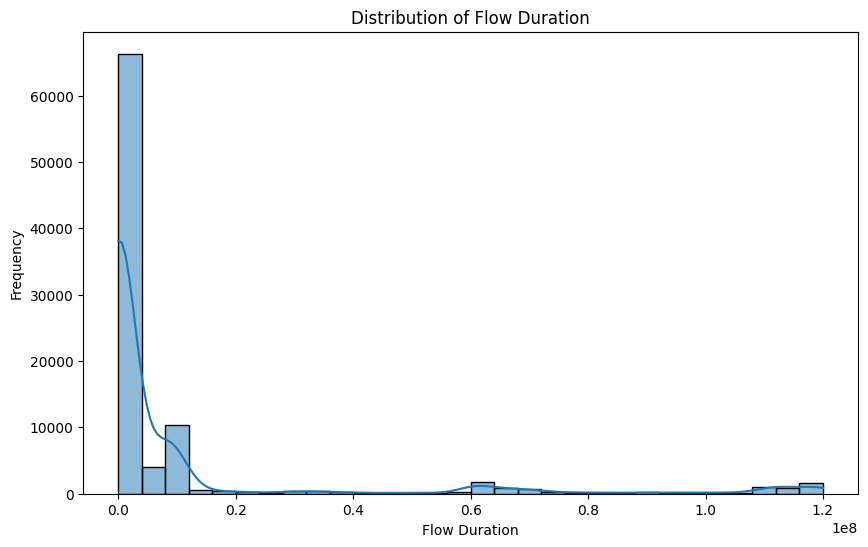

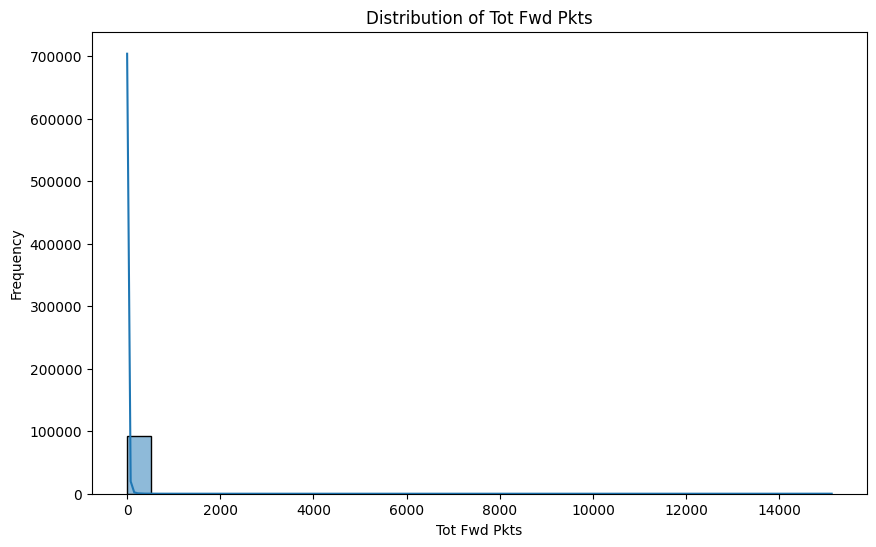

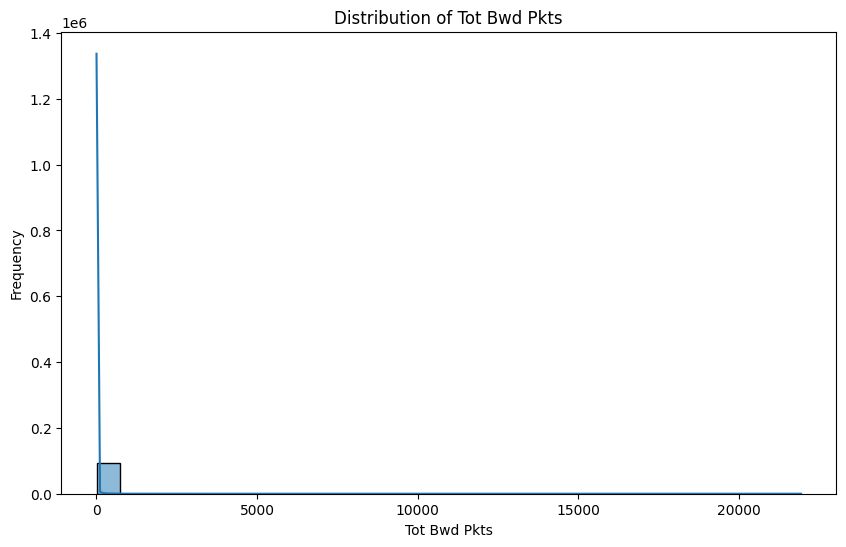

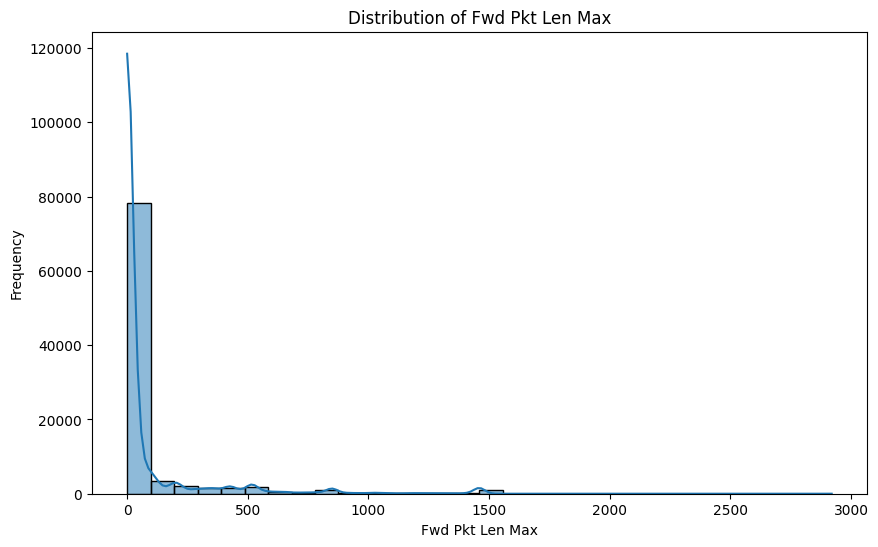

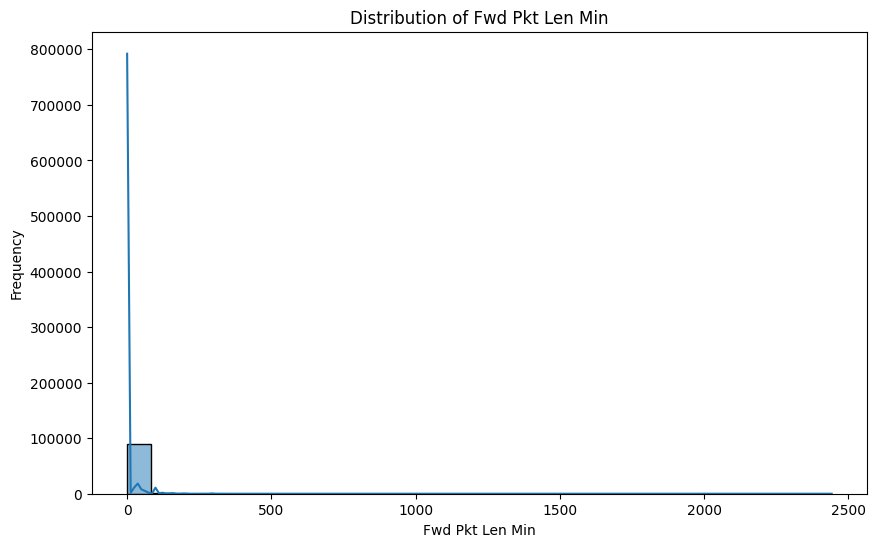

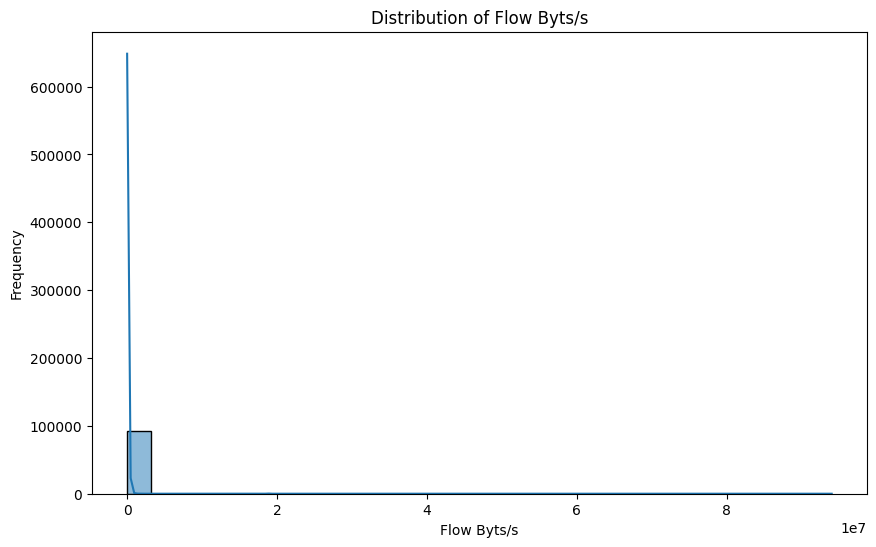

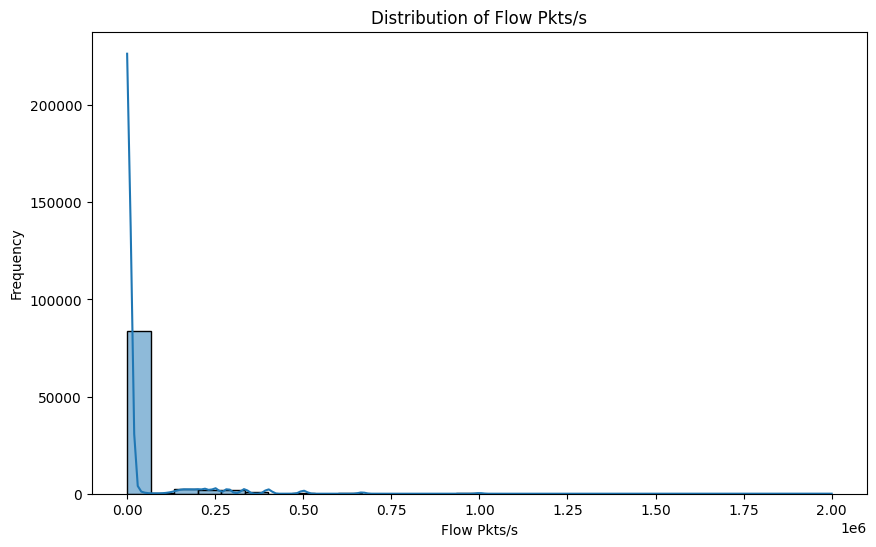

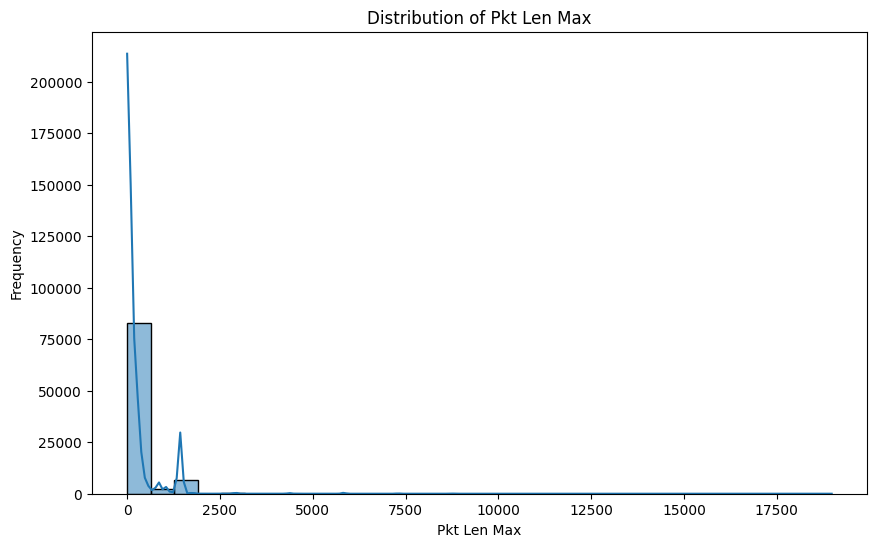

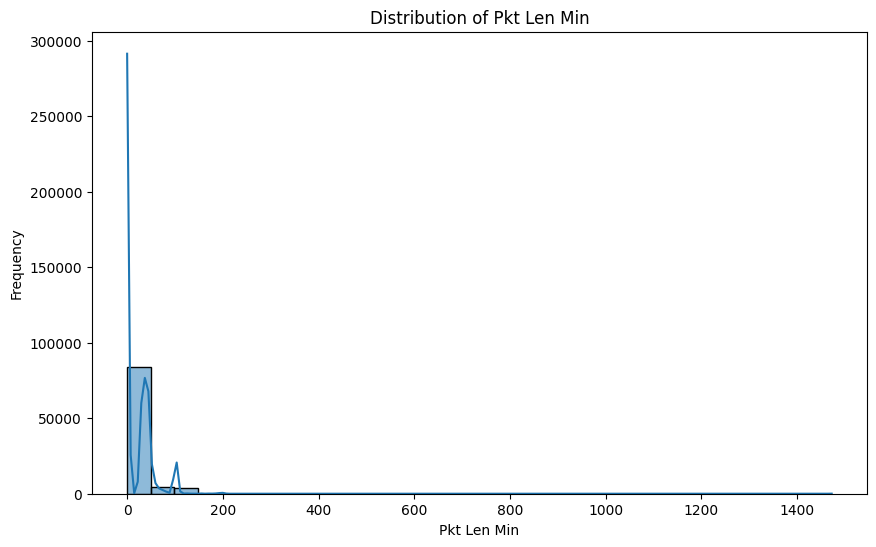

In [34]:
#histograms for all features
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(X[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

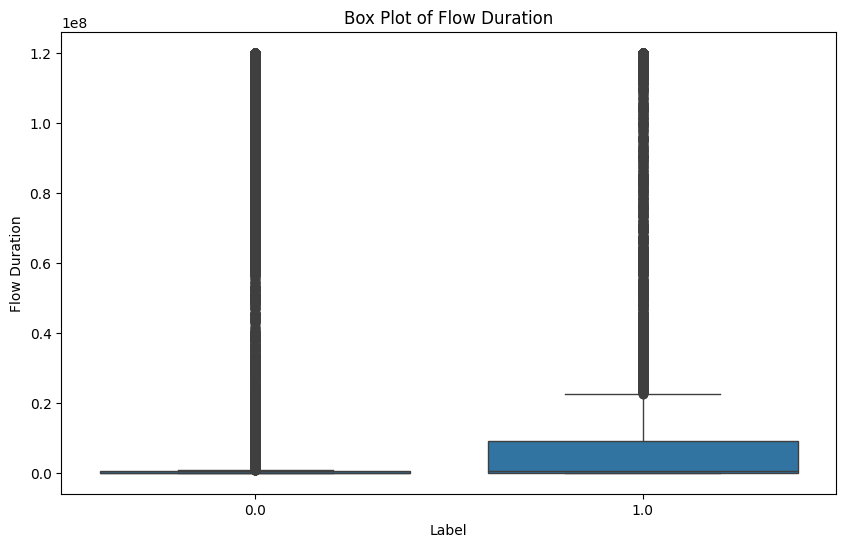

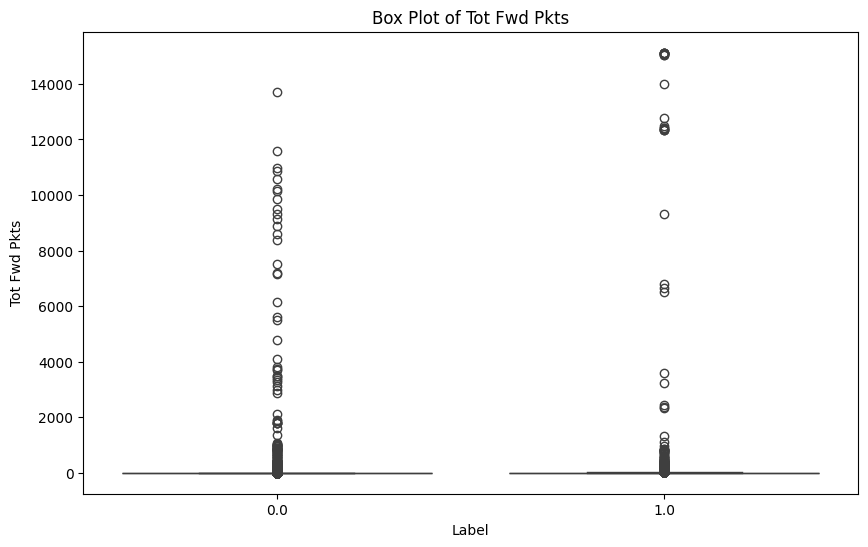

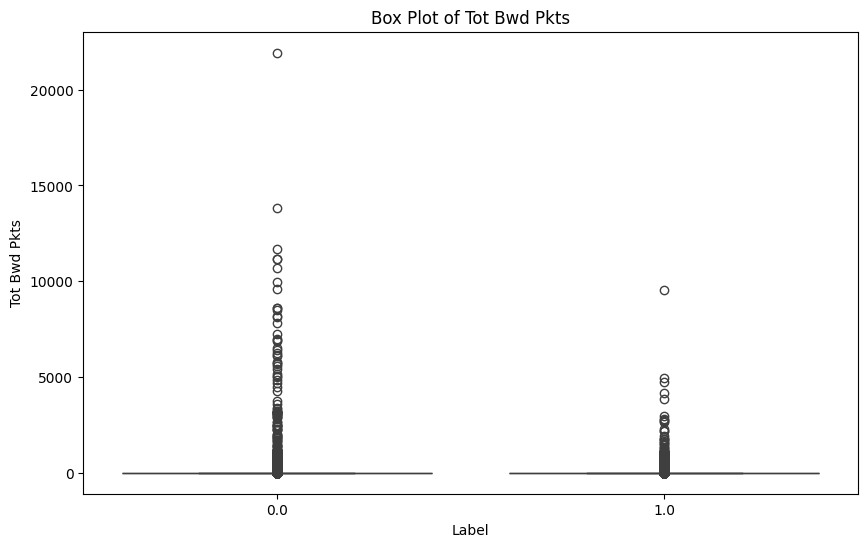

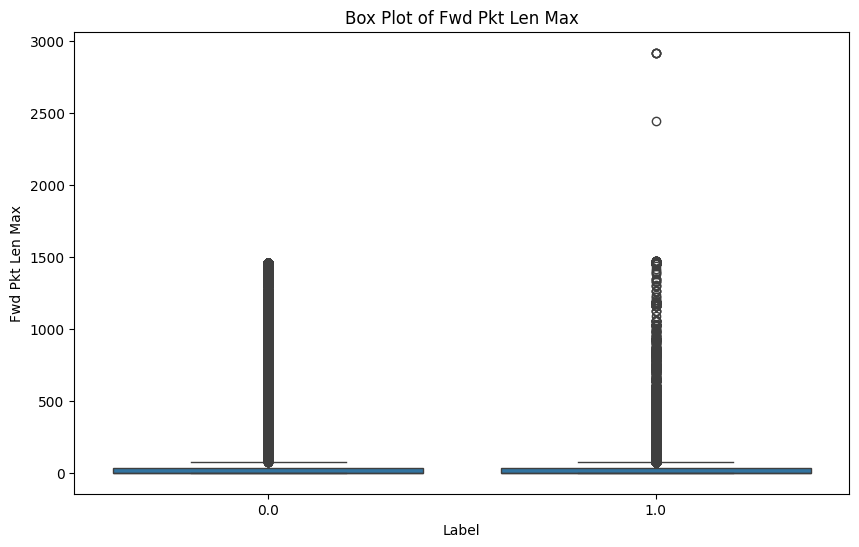

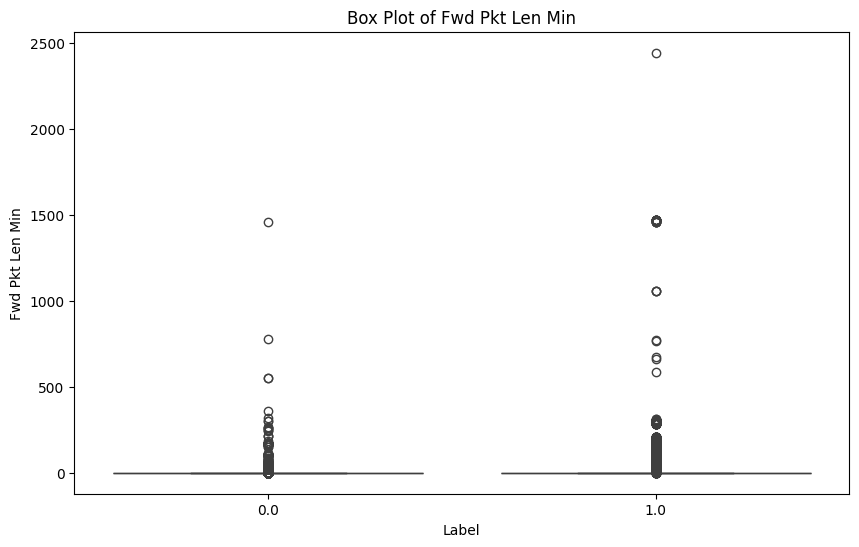

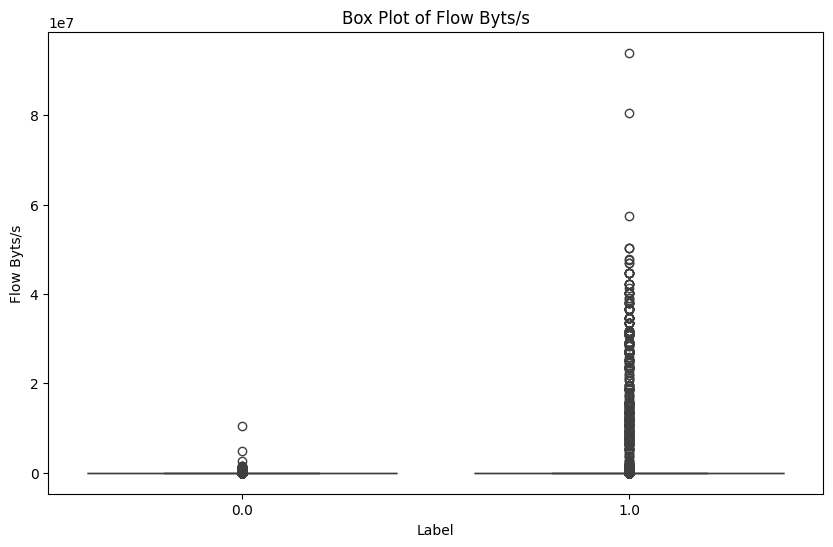

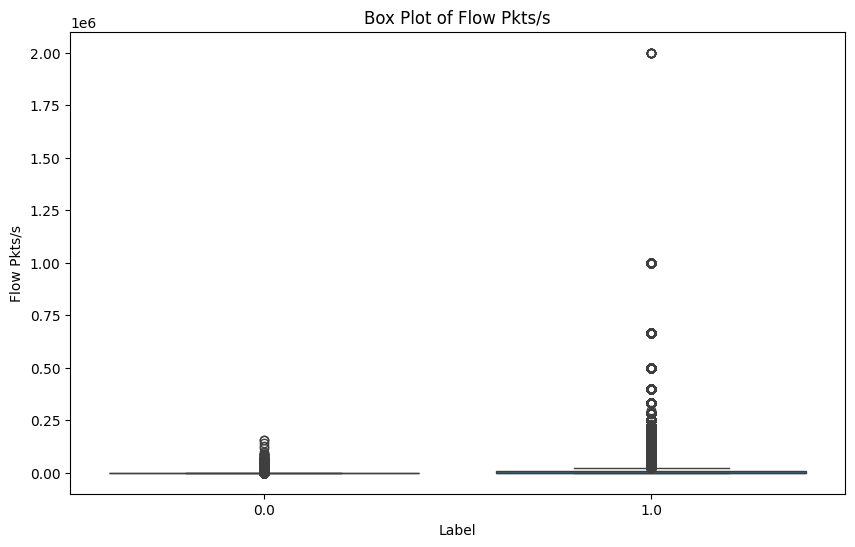

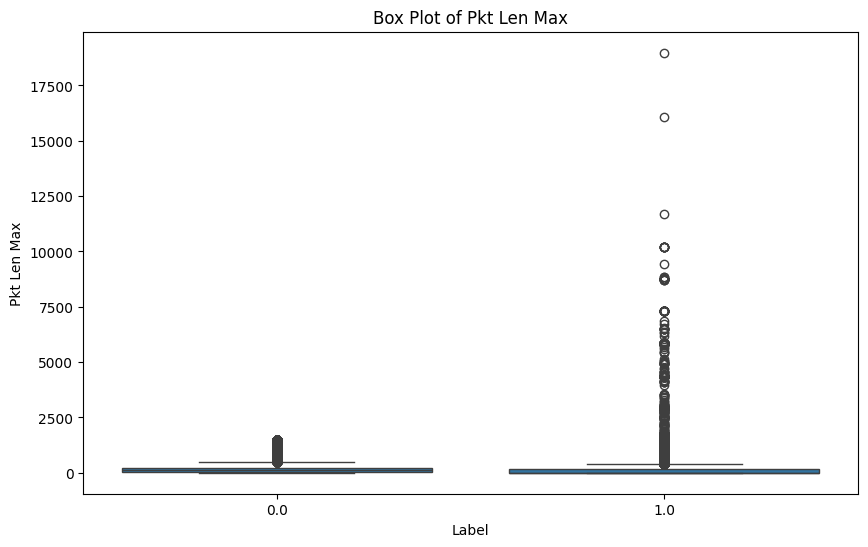

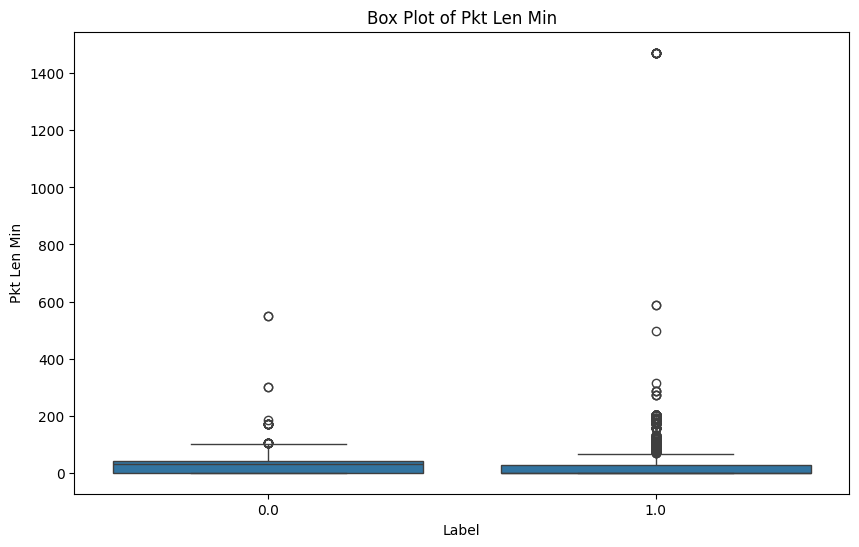

In [35]:
#box plots for all features
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=y, y=X[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel('Label')
    plt.ylabel(feature)
    plt.show()

In [38]:
#summary statistic
summary_stats = X.describe()
print(summary_stats)

       Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  Fwd Pkt Len Max  \
count   9.221200e+04  92212.000000  92212.000000     92212.000000   
mean    1.070781e+07     10.943370     12.974233        77.677287   
std     2.708038e+07    249.027375    188.163610       227.595074   
min     1.000000e+00      0.000000      1.000000         0.000000   
25%     2.182200e+04      0.000000      1.000000         0.000000   
50%     7.014100e+04      1.000000      2.000000         0.000000   
75%     6.500053e+06      5.000000      3.000000        30.000000   
max     1.200000e+08  15123.000000  21933.000000      2920.000000   

       Fwd Pkt Len Min   Flow Byts/s   Flow Pkts/s   Pkt Len Max   Pkt Len Min  
count     92212.000000  9.221200e+04  9.221200e+04  92212.000000  92212.000000  
mean          6.762699  1.138193e+05  2.648651e+04    235.485761     22.072171  
std          33.400015  1.720914e+06  9.508670e+04    510.389706     32.892671  
min           0.000000  0.000000e+00  1.694919e-02    

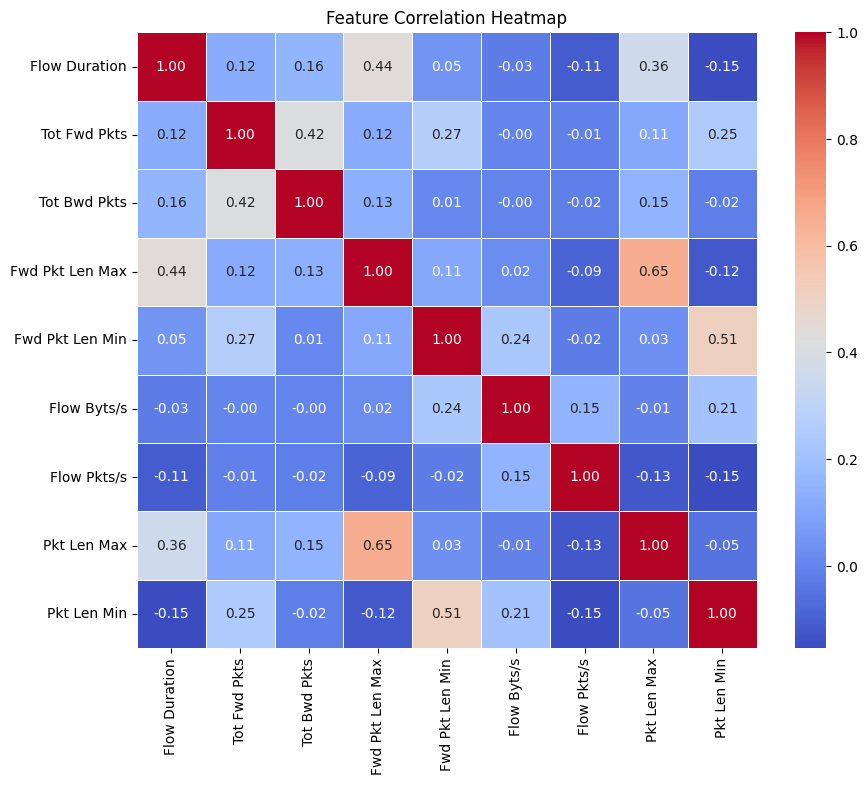

In [39]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Draw the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split

# Let's divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Here X is assumed to be the DataFrame containing your properties and y is assumed to be a Series containing tags.
# test_size specifies the ratio of the test set. In this case, 70% were reserved for training, 30% for testing.
#random_state is a seed value used when dividing data randomly. This way you will get the same results every time.


In [41]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model's performance on the training set
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Evaluate the model's performance on the test set
test_accuracy = model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.6374016235979426
Test Accuracy: 0.6326633892423366


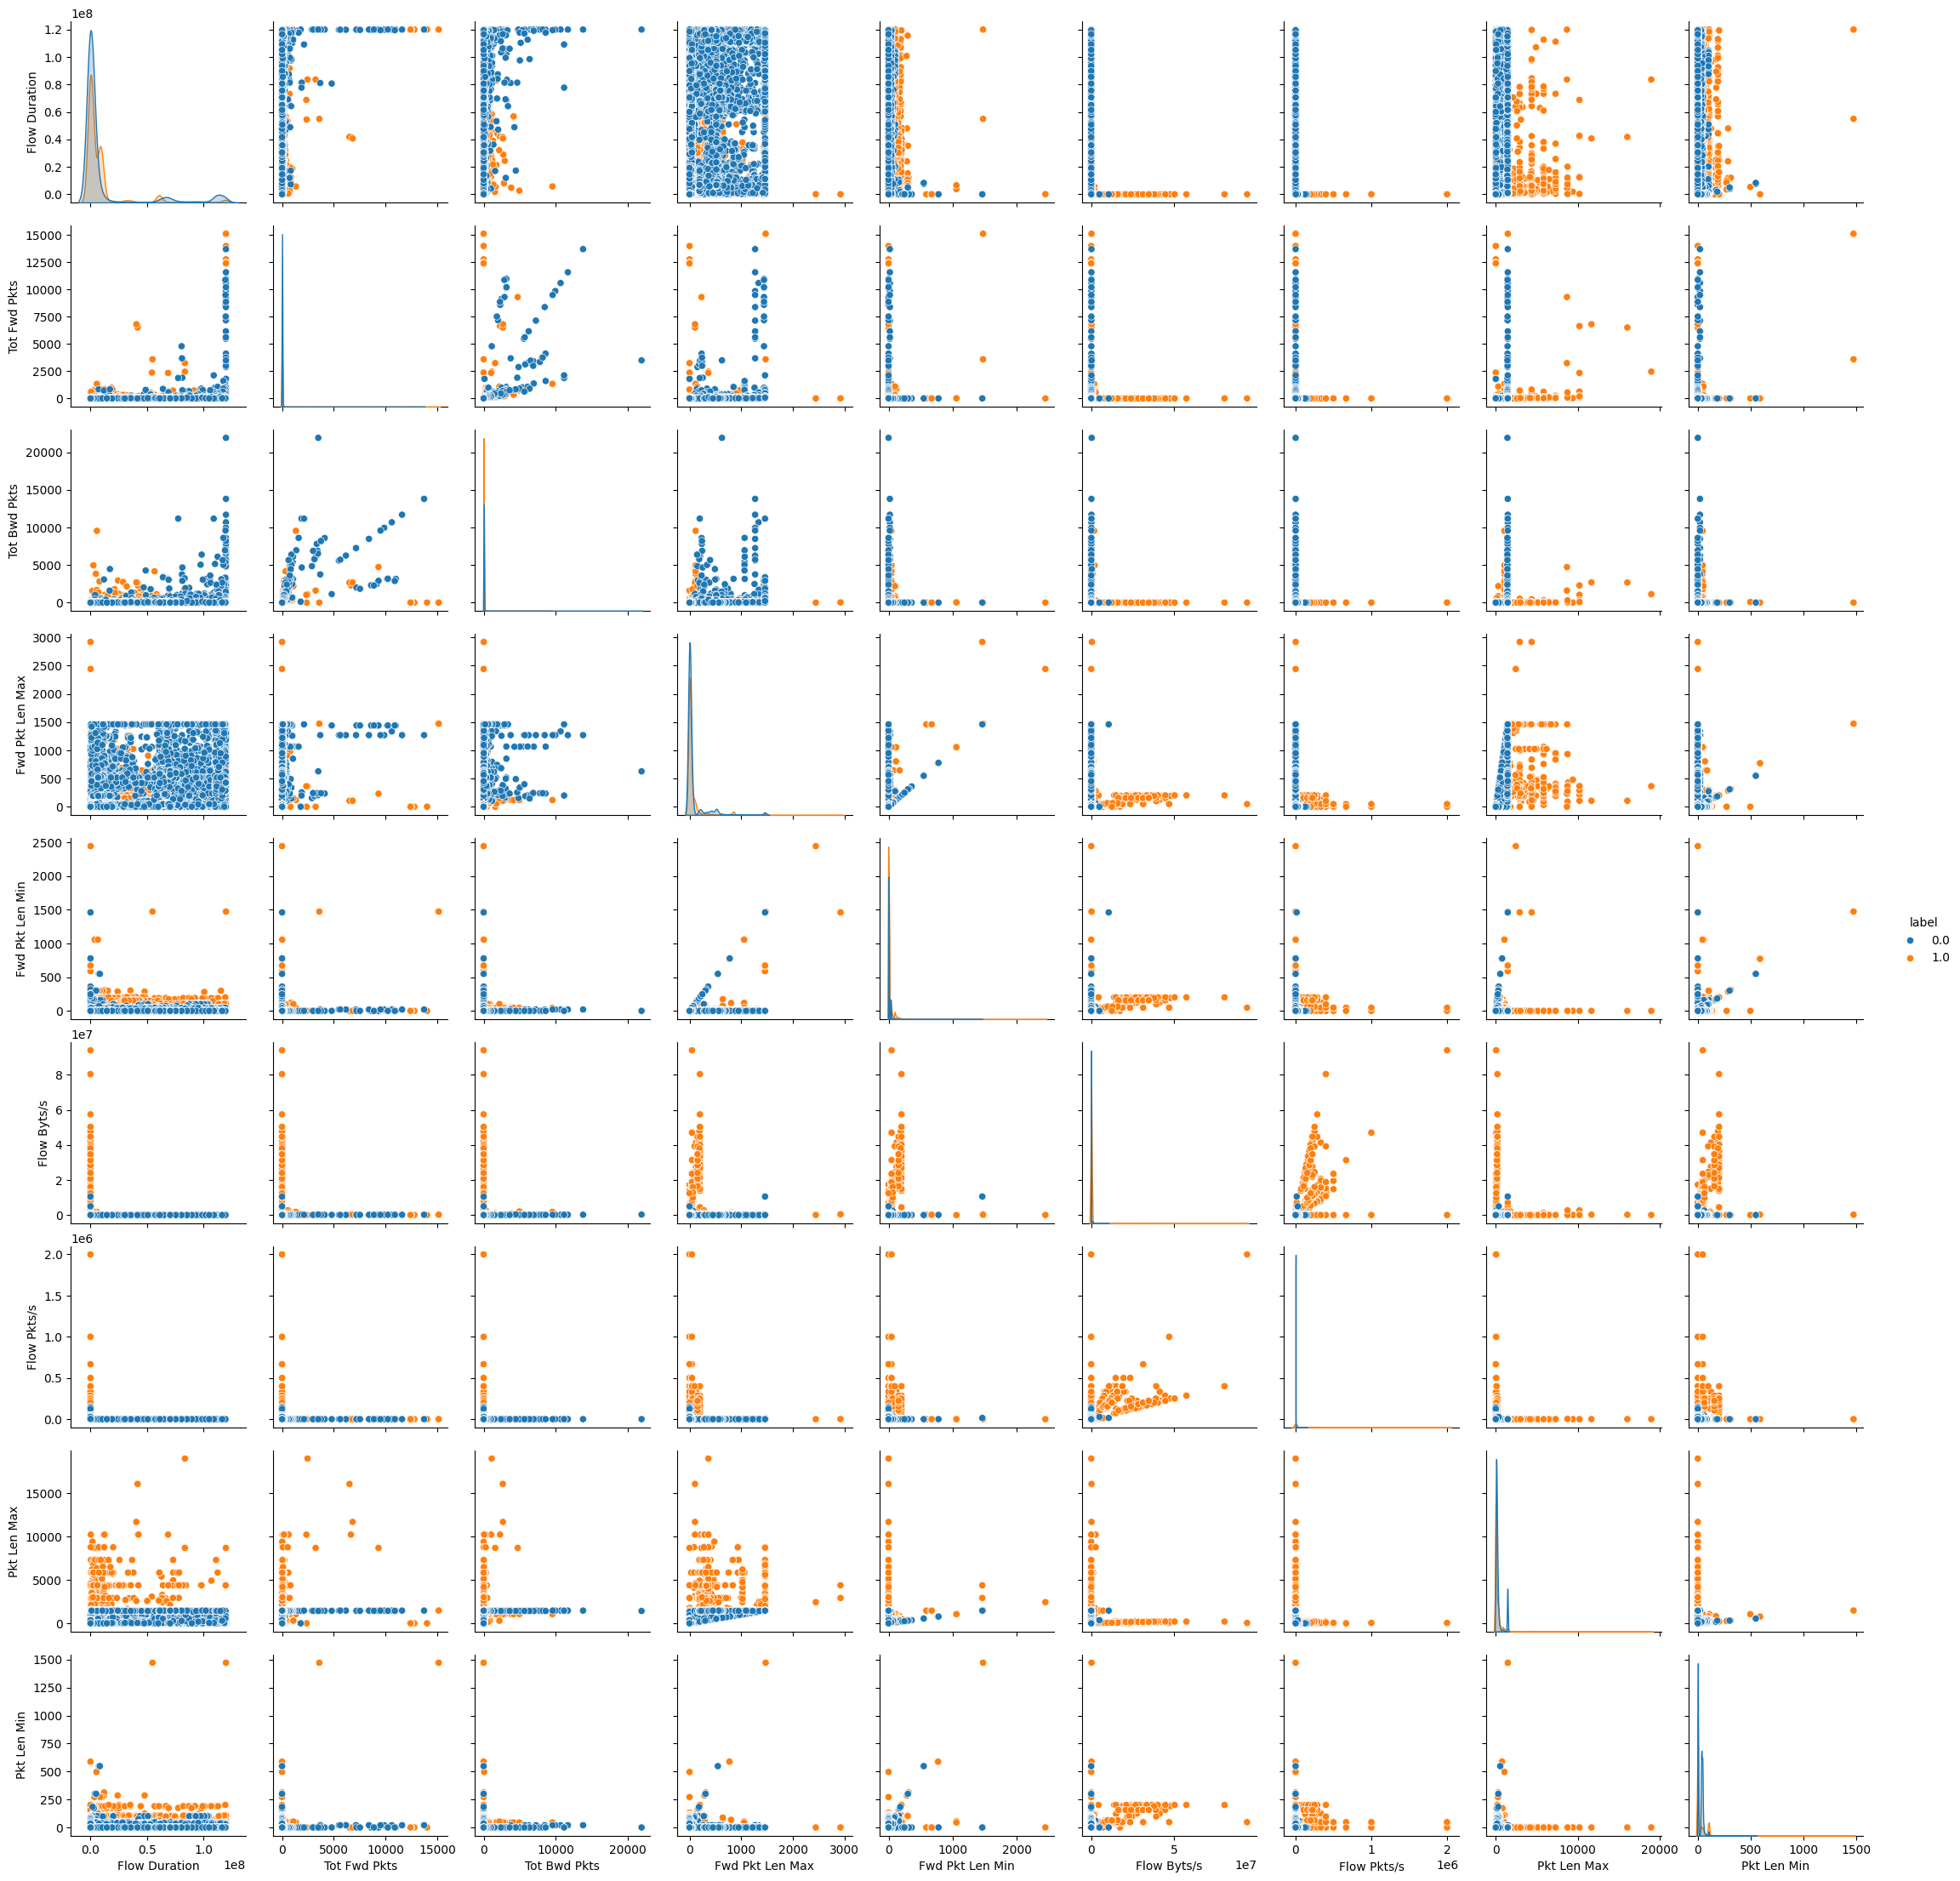

In [32]:
data_with_labels = pd.concat([X, y], axis=1)
sns.pairplot(data_with_labels, hue='label')

In [36]:
plt.show()

In [37]:
print(X.describe())

       Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  Fwd Pkt Len Max  \
count   9.221200e+04  92212.000000  92212.000000     92212.000000   
mean    1.070781e+07     10.943370     12.974233        77.677287   
std     2.708038e+07    249.027375    188.163610       227.595074   
min     1.000000e+00      0.000000      1.000000         0.000000   
25%     2.182200e+04      0.000000      1.000000         0.000000   
50%     7.014100e+04      1.000000      2.000000         0.000000   
75%     6.500053e+06      5.000000      3.000000        30.000000   
max     1.200000e+08  15123.000000  21933.000000      2920.000000   

       Fwd Pkt Len Min   Flow Byts/s   Flow Pkts/s   Pkt Len Max   Pkt Len Min  
count     92212.000000  9.221200e+04  9.221200e+04  92212.000000  92212.000000  
mean          6.762699  1.138193e+05  2.648651e+04    235.485761     22.072171  
std          33.400015  1.720914e+06  9.508670e+04    510.389706     32.892671  
min           0.000000  0.000000e+00  1.694919e-02    